## Exercício 1

A tabela abaixo apresenta os valores de $Cº_{p,m} (J mol^{-1} K^{-1})$ para  $O_2(g)$ no intervalo de tempertaura de 298K até 1500K. a) Ajuste um polinômio de terceiro grau ao dados de capacidade calorífica em função da temperatura e construa o gráfico de $Cº_{p,m}$ versus temperatura. b) Uma segunda alternativa é ajustar uma função do tipo $Cº_{p,m} = A + BT + CT^2 + D/T^2 $ aos dados fornecidos. Ajuste esta função aos dados fornecidos e construa o gráfico de $Cº_{p,m}$ versus temperatura. c) Compare os resultados obtidos.

|   |   |   |   |   |   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|T (K)|298.15|400.|500.|600.|700.|800.|900.|1000.|1100.|1200.|1300.|1400.|1500.
|Cp (J/K mol)|29.376| 30.106| 31.091| 32.090| 32.981| 33.733| 34.355| 34.870| 35.300| 35.667| 35.988| 36.277| 36.544


In [ ]:
# Tudo começa com a importação dos módulos necessários para fazer as contas
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import quad


In [ ]:
T = np.array([298.15,400.,500.,600.,700.,800.,900.,1000.,1100.,1200.,1300.,1400.,1500.])
Cp = np.array([29.376, 30.106, 31.091, 32.090, 32.981, 33.733, 34.355, 34.870, 35.300, 35.667,35.988, 36.277, 36.544])

deg = 3
z = np.polyfit(T, Cp, deg)
y = np.poly1d(z)


print('Cºp,m = ' + format(z[3] , ' 6.5f') + ' +' + format(z[2] , ' 6.5f') + 'T' + format(z[1] , ' 6.5e') + 'T²' + format(z[0] , ' 6.5e') + 'T³')   

#imprimir só os coeficientes na forma de vetor
z



Cºp,m =  25.66508 + 0.01304T-3.81147e-06T²-5.57560e-11T³


array([-5.57559849e-11, -3.81147086e-06,  1.30449460e-02,  2.56650822e+01])

<function matplotlib.pyplot.show(*args, **kw)>

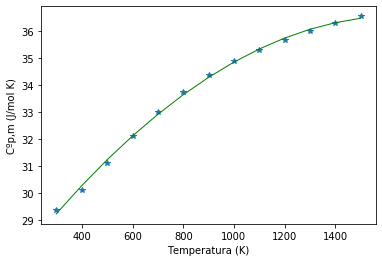

In [ ]:
plt.plot(T,Cp,'*')
plt.plot(T,y(T), color='green', linewidth=1)
plt.xlabel('Temperatura (K)')
plt.ylabel('Cºp,m (J/mol K)')
plt.show

In [ ]:
# Definir a função que será ajustada
def func(T, a, b, c, d):

    return a + b*T + c*T**2 + d/T**2

# ajuste da função usando mínimos quadrados
# popt são os parâmetros do modelo obtidos após ajuste
# pcov é a matriz de covariância de popt. A partir dela pode ser calculado o desvio padrão de cada parâmetro do ajuste
popt, pcov = curve_fit(func, T, Cp)


print('Cºp,m = ' + format(popt[0] , ' 6.3e') + ' +' + format(popt[1] , ' 6.3e') + 'T ' + format(popt[2] , ' 6.3e') + 'T²  +' + format(popt[3] , ' 6.5e') + '/T²')   

#imprimir só os coeficientes na forma de vetor
popt

Cºp,m =  2.483e+01 + 1.456e-02T -4.560e-06T²  + 4.90797e+04/T²


array([ 2.48294824e+01,  1.45554447e-02, -4.55956846e-06,  4.90796782e+04])

<function matplotlib.pyplot.show(*args, **kw)>

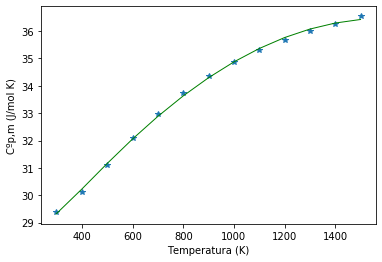

In [ ]:
plt.plot(T,Cp,'*')
plt.plot(T,func(T, *popt), color='green', linewidth=1)
plt.xlabel('Temperatura (K)')
plt.ylabel('Cºp,m (J/mol K)')
plt.show

## Exercício 2

Gráficos de Cp/T versus T são usados para determinar a entropia de um material, uma vez que o valor de entropia é igual a área sob a curva. A tabela abaixo apresenta a variação de Cp do $Na_2SO_4$ em função da temperatura. a) Ajuste um polinômio de terceira ordem que passa pela origem aos dados fornecidos e calcule a entropia do $Na_2SO_4$ a 90 K. b) Em baixas temperaturas é possível ajustar uma função do tipo aT³ aos valores de Cp/T (“a” é uma constante). Investigue em qual intervalo de temperaturas esta aproximação é válida. c) Ajuste uma função do tipo $ Cº_{p,m} = A + BT + CT^2 + \frac{D}{T^2} $ e calcule a entropia a 90 K. d) Ajuste uma função do tipo $ Cº_{p,m} = A + BT + CT^2 + DT^3 $ e calcule a entropia a 90 K. Compare os ajustes dos itens (c) e (d).

|   |   |   |   |   |   |   |   |   |  
|---|---|---|---|---|---|---|---|---|
|Cp($cal K^{-1}$ )|0.171|0.286|0.626|1.615|4.346|7.032|10.48|13.28|15.33
|T(K)|13.74|16.25|20.43|27.73|41.11|52.72|68.15|82.96|95.71


### Solução (a)

In [ ]:
T = np.array([13.74,16.25,20.43,27.73,41.11,52.72,68.15,82.96,95.71])
Cp = np.array([0.171,0.286,0.626,1.615,4.346,7.032,10.48,13.28,15.33])

# Definir a função que será ajustada
def func(T, b, c, d):

    return b*T + c*T**2 + d*T**3

# ajuste da função usando mínimos quadrados
# popt são os parâmetros do modelo obtidos após ajuste
# pcov é a matriz de covariância de popt. A partir dela pode ser calculado o desvio padrão de cada parâmetro do ajuste
popt, pcov = curve_fit(func, T, Cp)


print('Cºp,m = ' + format(popt[0] , ' 6.3e') + 'T  +' + format(popt[1] , ' 6.3e') + 'T² ' + format(popt[2] , ' 6.5e') + 'T³')   

#imprimir só os coeficientes na forma de vetor
popt

Cºp,m = -5.746e-02T  + 5.167e-03T² -3.03363e-05T³


array([-5.74633196e-02,  5.16679456e-03, -3.03363216e-05])

<function matplotlib.pyplot.show(*args, **kw)>

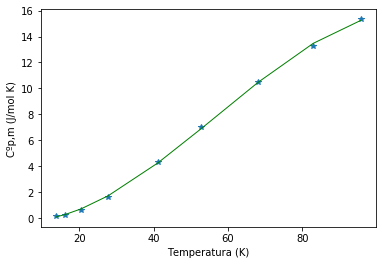

In [ ]:
plt.plot(T,Cp,'*')
plt.plot(T,func(T, *popt), color='green', linewidth=1)
plt.xlabel('Temperatura (K)')
plt.ylabel('Cºp,m (J/mol K)')
plt.show

In [ ]:
# Fazendo a integração no intervalo desejado

def func(T):

    return popt[0] + popt[1]*T + popt[2]*T**2

ans, err = quad(func, 0, 90) #calcula a integral da função da acima e o erro da integração
print('Delta S (J/K mol)= ' + format(ans , '6.3f'))
print('erro da integração = ' + format(err, '6.3e'))

Delta S (J/K mol)=  8.382
erro da integração = 1.006e-13


### Solução (b)
É preciso analisar o intervalo no qual o ajusto pedido é válido.

a= 6.383e-05
desvio padrão do ajuste = 1.919e-06


<function matplotlib.pyplot.show(*args, **kw)>

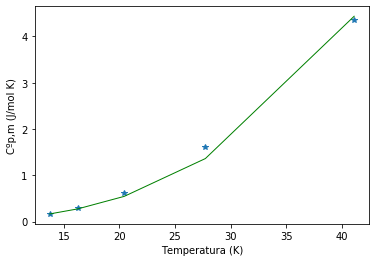

In [ ]:

Ti = T[:5] 
Cpi = Cp[:5]
# Definir a função que será ajustada
def func(Ti, a):

    return a*Ti**3

a, pcov = curve_fit(func, Ti, Cpi) # faz o ajuste do modelo

perr = np.sqrt(np.diag(pcov)) # calcula o desvio padrão do modelo

#imprimir só os coeficientes na forma de vetor
print('a= ' + format(a[0] , '6.3e'))
print('desvio padrão do ajuste = ' + format(perr[0], '6.3e'))

plt.plot(Ti,Cpi,'*')
plt.plot(Ti,func(Ti, *a), color='green', linewidth=1)
plt.xlabel('Temperatura (K)')
plt.ylabel('Cºp,m (J/mol K)')
plt.show

### Solução conjunta dos itens (c) e (d)

In [ ]:
# Considerando a primeira função


# Definir a função que será ajustada
def func(T, a, b, c, d):

    return a + b*T + c*T**2 + d/T**2

# ajuste da função usando mínimos quadrados
# popt são os parâmetros do modelo obtidos após ajuste
# pcov é a matriz de covariância de popt. A partir dela pode ser calculado o desvio padrão de cada parâmetro do ajuste
popt, pcov = curve_fit(func, T, Cp)


print('Cºp,m = ' + format(popt[0] , ' 6.3e') + ' +' + format(popt[1] , ' 6.3e') + 'T ' + format(popt[2] , ' 6.3e') + 'T²  +' + format(popt[3] , ' 6.5e') + '/T²')   

#imprimir só os coeficientes na forma de vetor
popt


def func(T):

    return popt[0]/T + popt[1] + popt[2]*T + popt[3]/T**3

ans, err = quad(func, 0, 90)

print('Delta S (J/K mol)= ' + format(ans , '6.3f'))
print('erro da integração = ' + format(err, '6.3e'))

Cºp,m = -6.436e+00 + 2.829e-01T -5.728e-04T²  + 5.61810e+02/T²
Delta S (J/K mol)= -36.947
erro da integração = 2.677e+01


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.


In [ ]:
# Considerando o polinômio do terceiro grau


deg = 3
z = np.polyfit(T, Cp, deg)
y = np.poly1d(z)


print('Cºp,m = ' + format(z[3] , ' 6.5f') + format(z[2] , ' 6.5f') + 'T + ' + format(z[1] , ' 6.5e') + 'T² ' + format(z[0] , ' 6.5e') + 'T³')   

#imprimir só os coeficientes na forma de vetor
print(z)
print()


def func(T):

    return z[3]/T + z[2] + z[1]*T + z[0]*T**2

ans, err = quad(func, 0, 90)

print('Delta S (J/K mol)= ' + format(ans , '6.3f'))
print('erro da integração = ' + format(err, '6.3e'))

Cºp,m = -0.20558-0.04189T +  4.85438e-03T² -2.85176e-05T³
[-2.85176338e-05  4.85438172e-03 -4.18860690e-02 -2.05576078e-01]

Delta S (J/K mol)=  0.393
erro da integração = 1.922e+00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


Os três valores de entropia calculados nos itens (a), (c) e (d) diferem quanto ao valor e sinal. Não havendo acordo entre os métodos empregados. Era de se esperar que os três resultados apresentassem uma pequena diferença e não o desacordo observado. O erro ocorre porque as funções utilizadas nos itens (c) e (d) apresentam uma idneterminação na origem, o que levará a problemas de integração. Nestes casos, a integral deve ser separada em dois intervalos:

$$ \Delta Sº = \int_{0}^{90} \frac{C_p}{T} dT = \int_{0}^{T_{baixa}} \frac{C_p}{T} dT + \int_{T_{baixa}}^{90} \frac{C_p}{T} dT $$

Como visto no item (b), Cp pode ser ajustado a uma função do tipo $ aT^3$, de forma que a integração se torna:  

$$ \Delta Sº = \int_{0}^{T_{baixa}} \frac{aT^3}{T} dT + \int_{T_{baixa}}^{90} \frac{C_p}{T} dT $$ 

ou 

$$ \Delta Sº = \frac{aT^3}{3} + \int_{T_{baixa}}^{90} \frac{C_p}{T} dT = \frac{C_p}{3} + \int_{T_{baixa}}^{90} \frac{C_p}{T} dT$$ 

Onde $C_p$ da primeira integral da direita se refere ao valor da capacidade calorífica em $T_{baixa}$. Em nosso caso, é maior valor T para o qual é válido o ajuste da função aT³ usada no item (c).
Vamos resolver os problemas com as modificações necessárias. 

In [ ]:
# Considerando a primeira função
# Não é preciso refazer o ajuste, pois os coeficientes já estão salvos.

def func1(T):

    return a[0]*T**2

ans1, err1 = quad(func1, 0, 40)


def func2(T):

    return popt[0]/T + popt[1] + popt[2]*T + popt[3]/T**3

ans2, err2 = quad(func2, 40, 90)

DS = ans1 + ans2
erro = err1 + err2

print('Delta S (J/K mol)= ' + format(DS , '6.3f'))
print('erro da integração = ' + format(erro, '6.3e'))

Delta S (J/K mol)=  8.565
erro da integração = 9.509e-14


In [ ]:
# Considerando a primeira função
# Não é preciso refazer o ajuste, pois os coeficientes já estão salvos.
# Esta primeira integração não precisa ser repetida, pois os resultado será o mesmo. Mas calcularemos de novo a integral
# para fixar a necessidade da separação dos cálculos

def func1(T):

    return a[0]*T**2

ans1, err1 = quad(func1, 0, 40)


def func2(T):

    return z[3]/T + z[2] + z[1]*T + z[0]*T**2

ans2, err2 = quad(func2, 40, 90)


DS = ans1 + ans2
erro = err1 + err2

print('Delta S (J/K mol)= ' + format(DS , '6.3f'))
print('erro da integração = ' + format(erro, '6.3e'))

Delta S (J/K mol)=  8.556
erro da integração = 9.499e-14


Verifiquem que o resultado dos itens (a), (c) e (d) são similares. A escolha do modelo matemático implica nos cálculos que pretende realizar e as propriedades que pretende calcular.